# 1. Importar librerias y cargar dataset

## 1.1 Importar librerias

In [259]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

## 1.2 Cargar dataset

In [260]:
data=pd.read_csv("properatti_clean.csv")
data.head()

,Unnamed: 0,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
0,0,PH,Mataderos,Capital Federal,-34.662,-58.509,62000.000,55.000,Sin informacion,caba,1127.273,0,0,0,0,1
1,2,apartment,Mataderos,Capital Federal,-34.652,-58.523,72000.000,55.000,Sin informacion,caba,1309.091,0,0,0,0,1
2,4,apartment,Centro,Buenos Aires Costa Atlántica,-38.003,-57.549,64000.000,35.000,Sin informacion,gran_buenos_aires,1828.571,0,0,0,0,1
3,6,PH,Munro,Bs.As. G.B.A. Zona Norte,-34.533,-58.522,130000.000,106.000,Sin informacion,gran_buenos_aires,1226.415,0,0,0,0,1
4,7,apartment,Belgrano,Capital Federal,-34.560,-58.443,138000.000,45.000,Sin informacion,caba,3066.667,0,0,0,0,1


### Dropeamos la primer columna ya que no nos aporta nada

In [261]:
data.drop(columns="Unnamed: 0", inplace=True)

# 2. ETL

## 2.1 Filtramos los datos para CABA y Apartment

In [262]:
data_caba = data.loc[data.region_name == "caba"]
data_caba = data_caba.loc[data_caba.property_type == "apartment"]
data_caba = data_caba.reset_index(drop=True)
data_caba.place_name.value_counts()

Belgrano           2187
Palermo            1978
Caballito          1862
Recoleta           1215
Villa Urquiza      1205
                   ... 
Velez Sarsfield      10
Villa Soldati         8
Villa Real            8
Catalinas             1
Villa Riachuelo       1
Name: place_name, Length: 62, dtype: int64

In [263]:
#place_drop = data_caba.place_name.value_counts().loc[data_caba.place_name.value_counts().values > 100]
#place_drop = place_drop.index.to_list()
#data_caba = data_caba[data_caba.place_name.isin(place_drop)]
#data_caba.reset_index(inplace=True, drop=True)


In [264]:
data_caba

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
0,apartment,Mataderos,Capital Federal,-34.652,-58.523,72000.000,55.000,Sin informacion,caba,1309.091,0,0,0,0,1
1,apartment,Belgrano,Capital Federal,-34.560,-58.443,138000.000,45.000,Sin informacion,caba,3066.667,0,0,0,0,1
2,apartment,Belgrano,Capital Federal,-34.560,-58.443,195000.000,65.000,Sin informacion,caba,3000.000,0,0,0,0,1
3,apartment,Palermo Soho,Capital Federal,NaN,NaN,111700.000,50.000,1 ambiente,caba,2234.000,1,0,0,1,1
4,apartment,Palermo Soho,Capital Federal,NaN,NaN,147900.000,42.000,1 ambiente,caba,3521.429,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21816,apartment,Recoleta,Capital Federal,-34.587,-58.397,165000.000,44.000,Sin informacion,caba,3750.000,0,1,0,0,1
21817,apartment,Belgrano,Capital Federal,-34.564,-58.443,410000.000,157.000,Sin informacion,caba,2611.465,0,0,0,0,1
21818,apartment,Belgrano,Capital Federal,-34.564,-58.443,410000.000,157.000,Sin informacion,caba,2611.465,0,0,0,0,1
21819,apartment,Villa Urquiza,Capital Federal,-34.571,-58.476,131500.000,46.000,Sin informacion,caba,2858.696,0,1,1,0,1


## Elimino todos los filas que tengan Nans (lat y lon tiene varias)

In [265]:
data_caba.dropna(how="any", inplace=True)
data_caba.reset_index(inplace=True, drop=True)

# 2.2 Dropeamos las columnas irrelevantes

Eliminamos state_name porque es redundante que son de capital federal y baño ya que hubo un error y la informacion de si tienen baño o no es irrelevante. Ademas elimi usd_m2 porque va a correlacion con las variables precio y m2

In [266]:
data_caba.drop(columns=[ "state_name", "region_name", "usd_m2"], inplace=True)

## 2.3 Creo las dummies para las variables categoricas

In [267]:
# Creo funcion dummie

from sklearn.preprocessing import OneHotEncoder 

def dummies_categoricas(categorias, dataframe):
    for feature in categorias:
        onehot = OneHotEncoder(drop = "first")
        X_enc= onehot.fit_transform(dataframe[[feature]]).toarray()
        enc_data = pd.DataFrame(X_enc, columns = onehot.get_feature_names_out())
        dataframe = pd.concat([dataframe.drop(columns=feature), enc_data], axis=1)
    return dataframe  

In [268]:
data_caba

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,pileta,parrilla,cochera,gimnasio,baño
0,apartment,Mataderos,-34.652,-58.523,72000.000,55.000,Sin informacion,0,0,0,0,1
1,apartment,Belgrano,-34.560,-58.443,138000.000,45.000,Sin informacion,0,0,0,0,1
2,apartment,Belgrano,-34.560,-58.443,195000.000,65.000,Sin informacion,0,0,0,0,1
3,apartment,Palermo,-34.581,-58.406,350000.000,104.000,3 ambientes,0,0,0,0,1
4,apartment,Palermo,-34.591,-58.412,270500.000,118.000,4 o mas ambientes,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16871,apartment,Barrio Norte,-34.599,-58.403,165000.000,91.000,Sin informacion,0,1,0,0,1
16872,apartment,Recoleta,-34.587,-58.397,165000.000,44.000,Sin informacion,0,1,0,0,1
16873,apartment,Belgrano,-34.564,-58.443,410000.000,157.000,Sin informacion,0,0,0,0,1
16874,apartment,Belgrano,-34.564,-58.443,410000.000,157.000,Sin informacion,0,0,0,0,1


## 2.4 Funciones

In [269]:
# Funcion para graficar Valores predichos vs Valores reales

def plot_predict(y_train_pred,y_test_pred,y_train, y_test, modelo=""):
    plt.figure(figsize=(10, 7))
    plt.scatter(y_train_pred, y_train, marker="v", s=20, c="red", alpha=0.8, label="Training data")
    plt.scatter(y_test_pred, y_test, marker="o", s=20, alpha=0.8, c="blue", label="Test data")
    plt.xlabel("Valores predichos")
    plt.ylabel("Valores reales")
    plt.title("Valores predichos vs Valores reales - " + modelo)
    plt.legend(loc="best")
    plt.plot([10.5, 13.5], [10.5, 13.5], c="black")

In [270]:
import statsmodels.api as sm

# OLS - Stats models
def ols_sumary(X_train, y_train, model):
    # Agregamos constante
    X_constant = sm.add_constant(X_train)

    
    # Fitiamos
    model_sm = sm.OLS(y_train,X_constant).fit()
    display(model_sm.summary())

    # Creamos diccionario para agregar los p-value
    d = {}
    for x in X_constant.columns.tolist():
        d[f'{x}'] = model_sm.pvalues[x]

    # Creamos dataframe y filtramos con las p-value mayores a 0.05
    df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value', ascending=False).reset_index(drop=True)
    display(df_pvalue[df_pvalue["p-Value"] > 0.05])

In [271]:
# Funcion para realizar prediccion, realizar scores.


from sklearn import metrics

# Creo diccionarios para al final hacer un dataframe con el resumen de todos los scores

scores_mae = {}
scores_mse = {}
scores_rmse ={}
scores_r2 = {}
scores_r2_adjust = {}

# Creo funcion
def scores_regression(X_train, X_test, y_train, y_test, model, modelo=""):
    
    # Fit y prediccion del modelo seleccionado
    model_var = model.fit(X_train, y_train)
    y_train_pred = model_var.predict(X_train) 
    y_test_pred = model_var.predict(X_test)
    
#  MAE:
    
    mae_train = round(metrics.mean_absolute_error(y_train, y_train_pred), 3)
    mae_test= round(metrics.mean_absolute_error(y_test, y_test_pred),3)
    
    scores_mae[(modelo + "_test")] = mae_test
    scores_mae[(modelo + "_train")] = mae_train
          
            
    print ('MAE - TRAIN:', mae_train)
    print ('MAE - TEST:', mae_test)
    print("-"*20 + "\n")  
# MSE

    mse_train = round(metrics.mean_squared_error(y_train, y_train_pred), 3)
    mse_test= round(metrics.mean_squared_error(y_test, y_test_pred),3)
    
    scores_mse[(modelo + "_test")] = mse_test
    scores_mse[(modelo + "_train")] = mse_train
    
    print ('MSE - TRAIN:', mse_train )
    print ('MSE - TEST:', mse_test)
    print("-"*20 + "\n")

# RMSE:

    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3)
    rmse_test= round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),3)
    
    scores_rmse[(modelo + "_test")] = rmse_test
    scores_rmse[(modelo + "_train")] = rmse_train
    
    print ('RMSE - TRAIN:', rmse_train)
    print ('RMSE - TEST:', rmse_test)
    print("-"*20 + "\n")

#R2

    r2_train = round((metrics.r2_score(y_train, y_train_pred)), 3)
    r2_test= round((metrics.r2_score(y_test, y_test_pred)),3)
    
    scores_r2[(modelo + "_test")] = r2_test
    scores_r2[(modelo + "_train")] = r2_train
    
    print ('R2 - TRAIN:', r2_train)
    print ('R2 - TEST:', r2_test)
    print("-"*20 + "\n")

# R2 ajustado

    r2_adjust_train = 1 - ( 1-r2_train ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
    r2_adjust_test = 1 - ( 1-r2_test ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
    
    scores_r2_adjust[(modelo + "_test")] = r2_adjust_test
    scores_r2_adjust[(modelo + "_train")] = r2_adjust_train
    
    print ('R2 AJUSTADO - TRAIN:', r2_adjust_train)
    print ('R2 AJUSTADO - TEST:', r2_adjust_test)
    print("-"*20 + "\n")
    

    plot_predict(y_train_pred,y_test_pred,y_train, y_test, modelo)
             
    if model_var != linreg:
        best_alpha = model_var.alpha_
        print(f"El mejor valor alpha es {best_alpha}")
    
    if model_var != linreg:
        print (f"El intercepto es {model_var.intercept_}")
        print("\t")
        print("Coeficientes del modelo:\t")
        print (model_var.coef_)
    

# MACHINE LEARNING

# PRIMER MODELO
Vamos a utilizar el dataset compeleto, sin eliminar ninguna variable (Salva las previamente dropeadas)

In [272]:
# Creamos una variable para estudiarla mejor

data_caba_full = data_caba

In [273]:
# Creo dummies

categorias = ["place_name", "rooms", "property_type"]

data_caba_full = dummies_categoricas(categorias,data_caba_full)


## Separo las features del target 

In [274]:
X = data_caba_full.drop(columns="price_aprox_usd")
y = data_caba_full["price_aprox_usd"]

## Split

In [275]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Estandarizar

In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Cargo los modelos

In [277]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
elastic = ElasticNetCV(cv=KFold(5, shuffle=True), alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 20, 30 ,40], random_state=1)
lasso = LassoCV(cv=KFold(5, shuffle=True), random_state=1, alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 20, 30 ,40])

## Linear regression
Realizamos el modelo con sklearn y luego analizamos el p-value de los coeficientes de las diferentes variables con StatsModels

MAE - TRAIN: 40477.997
MAE - TEST: 40743.322
--------------------

MSE - TRAIN: 5583496505.654
MSE - TEST: 5554569055.546
--------------------

RMSE - TRAIN: 74722.798
RMSE - TEST: 74528.981
--------------------

R2 - TRAIN: 0.815
R2 - TEST: 0.814
--------------------

R2 AJUSTADO - TRAIN: 0.8141962266396857
R2 AJUSTADO - TEST: 0.8131918819188191
--------------------



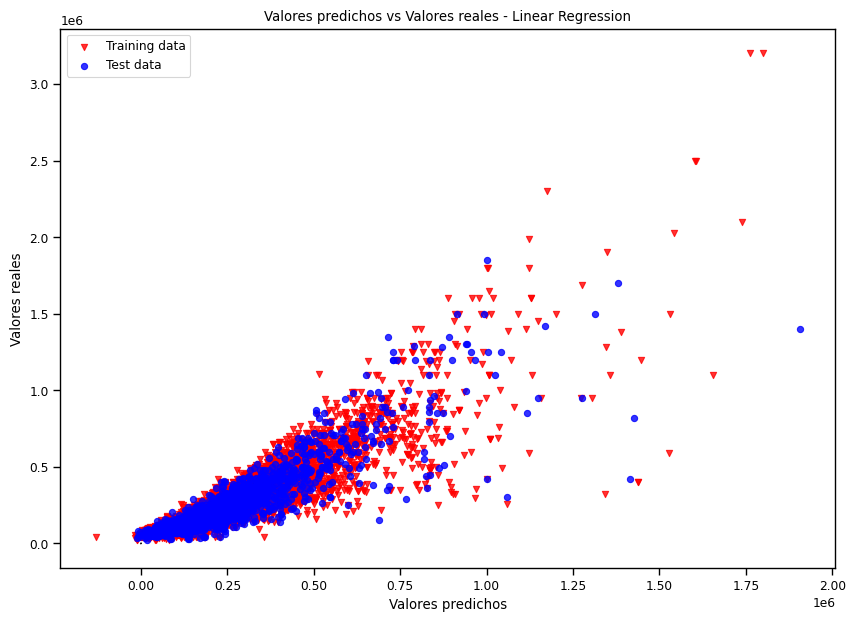

In [278]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, linreg, "Linear Regression")

## Analizamos coeficientes con Stats Models

In [279]:
ols_sumary(X_train, y_train, linreg)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     812.9
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:25:19   Log-Likelihood:            -1.7065e+05
No. Observations:               13500   AIC:                         3.414e+05
Df Residuals:                   13426   BIC:                         3.420e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.749e+06   9.01e+05      4.163      0.000    1.98e+06    5.51e+06
lat                             -1.058e+05   5.91e+04     -1.790      0.073   -2.22e+05       1e+04
lon                              1.273e+05   4.32e+04      2.948      0.003    4.27e+04    2.12e+05
surface_total_in_m2              2339.0866     14.169    165.086      0.000    2311.314    2366.860
pileta                           1.572e+04   2063.512      7.616      0.000    1.17e+04    1.98e+04
parrilla                        -6865.2746   1714.081     -4.005      0.000   -1.02e+04   -3505.435
cochera                          2.891e+04   1485.754     19.455      0.000     2.6e+04    3.18e+04
gimnasio                         2.662e+04   2463.825     10.806      0.000    2.18e+04    3.15e+04
baño                            -4794.1417   1400.208     -3.424      0.001   -7538.746   -2049.537
place_name_Agronomía              778.7203   1.94e+04      0.040      0.968   -3.73e+04    3.88e+04
place_name_Almagro               1763.1725   1.21e+04      0.146      0.884    -2.2e+04    2.55e+04
place_name_Balvanera            -2.148e+04   1.23e+04     -1.744      0.081   -4.56e+04    2660.948
place_name_Barracas             -3.312e+04   1.33e+04     -2.494      0.013   -5.91e+04   -7092.185
place_name_Barrio Norte          5.366e+04   1.21e+04      4.429      0.000    2.99e+04    7.74e+04
place_name_Belgrano              6.692e+04   1.26e+04      5.298      0.000    4.22e+04    9.17e+04
place_name_Boca                  -4.48e+04   1.54e+04     -2.907      0.004    -7.5e+04   -1.46e+04
place_name_Boedo                -1.089e+04   1.35e+04     -0.808      0.419   -3.73e+04    1.55e+04
place_name_Caballito             1.354e+04   1.19e+04      1.135      0.257   -9846.317    3.69e+04
place_name_Capital Federal       1.237e+04   1.34e+04      0.920      0.358    -1.4e+04    3.87e+04
place_name_Catalinas            -1.333e+05   7.59e+04     -1.757      0.079   -2.82e+05    1.55e+04
place_name_Centro / Microcentro -1.676e+04   1.36e+04     -1.233      0.218   -4.34e+04    9881.872
place_name_Chacarita             7309.1640    1.4e+04      0.521      0.602   -2.02e+04    3.48e+04
place_name_Coghlan                2.13e+04   1.42e+04      1.498      0.134   -6570.750    4.92e+04
place_name_Colegiales             2.53e+04   1.33e+04      1.908      0.056    -694.130    5.13e+04
place_name_Congreso             -3.027e+04   1.33e+04     -2.281      0.023   -5.63e+04   -4259.897
place_name_Constitución         -3.443e+04   1.37e+04     -2.518      0.012   -6.12e+04   -7627.432
place_name_Flores               -1.028e+04   1.21e+04     -0.849      0.396    -3.4e+04    1.34e+04
place_name_Floresta             -7796.4460    1.3e+04     -0.599      0.549   -3.33

,Var_name,p-Value
0,place_name_Agronomía,0.968
1,place_name_Liniers,0.932
2,place_name_Almagro,0.884
3,place_name_Villa General Mitre,0.818
4,place_name_Villa del Parque,0.758
5,place_name_Parque Centenario,0.685
6,place_name_Villa Santa Rita,0.667
7,place_name_Villa Luro,0.659
8,place_name_Paternal,0.641
9,place_name_Chacarita,0.602


Observamos que hay 45 variabeles (Mas de a mitad) en donde sus coeficientes no son estadisiticamente significativos. Su gran mayoria son de las dummies de los barrios de capital, ademas de lat y rooms_3_ambientes - rooms_2_ambientes.

## Lasso

Ahora realizamos un modelo con regulizacion con Lasso, con cross validation para encontrar el mejor alpha.

MAE - TRAIN: 40428.13
MAE - TEST: 40707.675
--------------------

MSE - TRAIN: 5584383297.332
MSE - TEST: 5559351462.213
--------------------

RMSE - TRAIN: 74728.731
RMSE - TEST: 74561.059
--------------------

R2 - TRAIN: 0.815
R2 - TEST: 0.813
--------------------

R2 AJUSTADO - TRAIN: 0.8141962266396857
R2 AJUSTADO - TEST: 0.8121875371979526
--------------------

El mejor valor alpha es 40.0
El intercepto es 191391.0987592593
	
Coeficientes del modelo:	
[-1.22676211e+03  4.24644303e+03  1.38515353e+05  6.06482189e+03
 -2.89792711e+03  1.39464346e+04  8.44814463e+03 -2.23901704e+03
 -3.22435429e+02 -5.50887114e+02 -4.21200032e+03 -4.01544111e+03
  1.01541305e+04  1.67602404e+04 -3.02537764e+03 -1.33094356e+03
  2.46390843e+03  7.01988105e+02 -1.13350118e+03 -1.80702496e+03
 -8.79939887e+00  1.03429762e+03  1.98962929e+03 -3.43468493e+03
 -3.45304125e+03 -3.45691767e+03 -1.66055131e+03  5.68428466e+03
 -6.99495676e+02 -1.48340427e+03 -4.80273900e+03 -8.92323933e+02
  5.42832354e+03 -

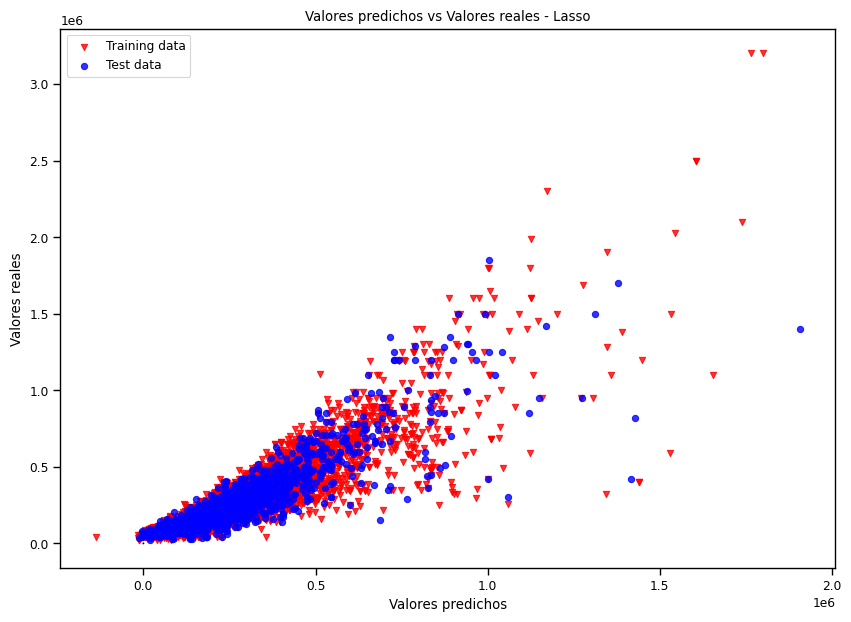

In [280]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, lasso, "Lasso")


Observamos que el mejor alpha es 40 y tiene un R2 del Test de 0.813, bastante bueno.

## ElasticNet

Con ElasticNet vamos a tener una regulizacion Lasso y Ridge. Utilizamos tambien cross validation para encontrar el mejor alpha

c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40554568180.515625, tolerance: 33647988673.771927
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26385123949113.527, tolerance: 33647988673.771927
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23846385313612.92, tolerance: 33647988673.771927
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:63

MAE - TRAIN: 40248.929
MAE - TEST: 40676.75
--------------------

MSE - TRAIN: 5647238476.206
MSE - TEST: 5549006193.73
--------------------

RMSE - TRAIN: 75148.11
RMSE - TEST: 74491.652
--------------------

R2 - TRAIN: 0.813
R2 - TEST: 0.814
--------------------

R2 AJUSTADO - TRAIN: 0.8121875371979526
R2 AJUSTADO - TEST: 0.8131918819188191
--------------------

El mejor valor alpha es 0.1
El intercepto es 191391.09875925942
	
Coeficientes del modelo:	
[ 2.08009611e+03  1.34338010e+03  1.28784100e+05  5.89297013e+03
 -2.13666466e+03  1.44717723e+04  8.18242007e+03 -1.53337258e+03
 -1.21438313e+03 -3.76956111e+03 -6.47962293e+03 -4.85553853e+03
  7.17598177e+03  1.10017537e+04 -3.69015094e+03 -2.67499384e+03
 -2.20559580e+03 -7.93340719e+02 -1.00511265e+03 -2.97080565e+03
 -1.76738065e+03 -1.20367051e+03 -3.36653065e+02 -4.69603568e+03
 -4.59969338e+03 -6.91242645e+03 -3.82613206e+03  4.28684197e+03
 -2.22563558e+03 -2.43755604e+03 -6.25124827e+03 -1.75427682e+03
  2.10109882e+03 -2.

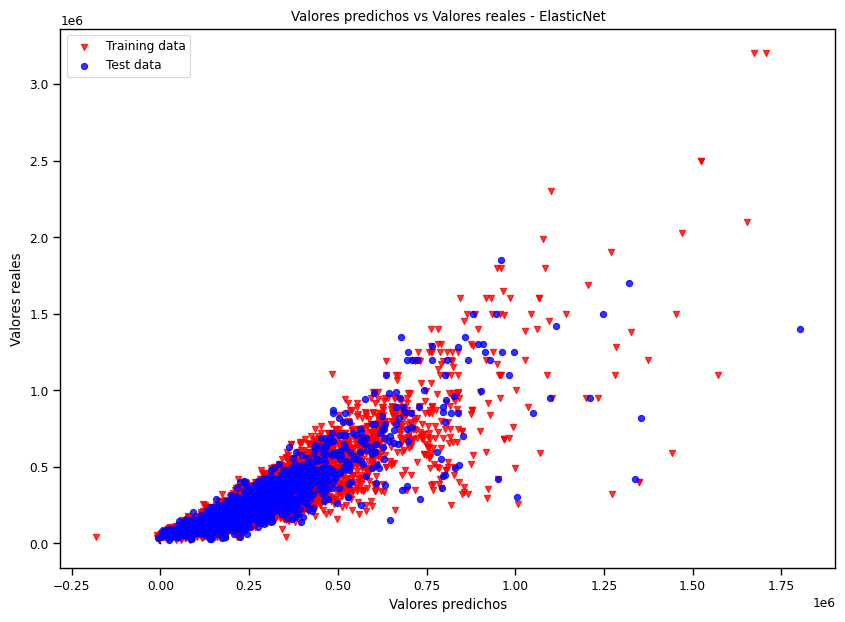

In [281]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, elastic, "ElasticNet")

El mejor alpha es 0.1. Observamos un rendimiento muy parecido al de los otros 2

# MODELO 2  - Filtrando variables segun correlacion


Creamos nueva variable para poder analizar y realizar modelos

In [282]:
# Primero creamos la variable que vaos a utilziar
data_caba_limpio = data_caba

Creamos las dummies salvo los barrios, para un mejor estudio

In [283]:
categorias_clean = ["rooms", "property_type"]

data_caba_limpio = dummies_categoricas(categorias_clean,data_caba_limpio)

## Correlación

Realizamos un heatmap de correlacion. ELiminaremos las que tengan correlacion 0. No se agregan las variables dummies de los barrios ya que no se podria observar bien

<AxesSubplot:>

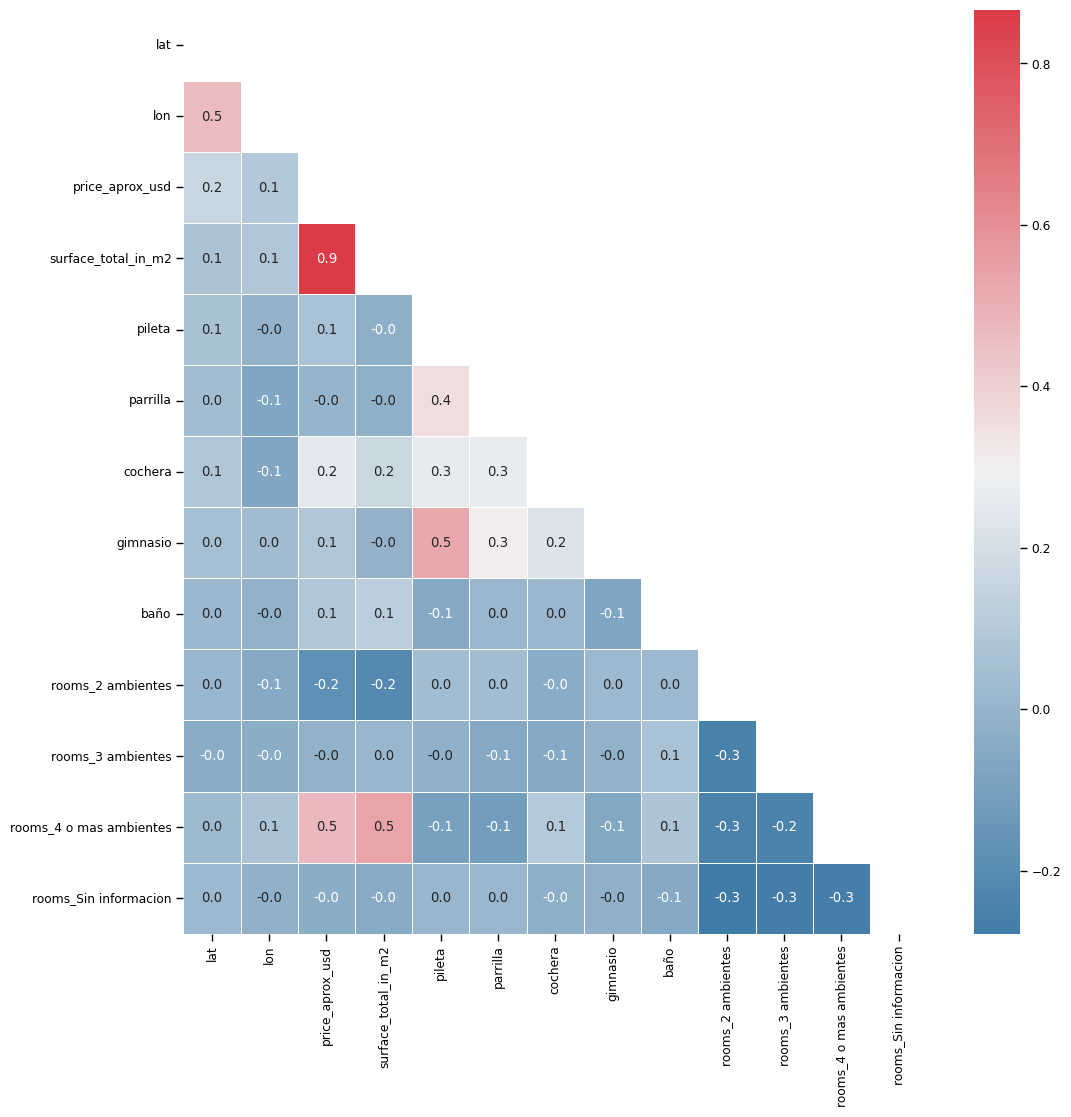

In [284]:
fig,ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
matrix = np.triu(data_caba_limpio.corr())
sns.heatmap(data_caba_limpio.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap, mask=matrix)

Se observa que el precio tiene una correlacion de 0 a 0.1 con las variables rooms_sin informacion, rooms_3 ambienttes, gimnasio, parrilla, pileta, baño.

### Eliminamos estas variables

In [285]:
data_caba_limpio.drop(columns=["rooms_Sin informacion", "rooms_3 ambientes", "gimnasio", "parrilla", "pileta", "baño"], inplace=True)

### Vamos a agrupar los barrios con menos de 100 propiedades en una categoria

In [286]:
data_caba_limpio_grouped =  data_caba_limpio.groupby("place_name")["place_name"].count()

data_caba_limpio_grouped_menor_100 = data_caba_limpio_grouped[data_caba_limpio_grouped <= 100].index.to_list()

data_caba_limpio.place_name = data_caba_limpio.place_name.replace(dict.fromkeys(data_caba_limpio_grouped_menor_100, "barrios_pocas_propiedades"))


In [287]:
data_caba_limpio.place_name.value_counts()

Belgrano                     1621
Caballito                    1557
Palermo                      1515
barrios_pocas_propiedades    1076
Recoleta                     1046
Flores                        888
Villa Urquiza                 874
Almagro                       756
Barrio Norte                  754
Villa Crespo                  722
San Telmo                     637
Balvanera                     497
Nuñez                         404
Monserrat                     330
Saavedra                      288
Barracas                      265
Floresta                      254
Colegiales                    253
San Cristobal                 235
Villa Luro                    234
Villa Devoto                  210
Villa del Parque              208
Congreso                      203
Palermo Hollywood             187
Coghlan                       175
Capital Federal               173
Boedo                         165
Retiro                        161
Constitución                  158
Centro / Micro

Creo las dummies para los barrios

In [288]:
data_caba_limpio = dummies_categoricas(["place_name"],data_caba_limpio)

In [289]:
data_caba_limpio

,lat,lon,price_aprox_usd,surface_total_in_m2,cochera,rooms_2 ambientes,rooms_4 o mas ambientes,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,...,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa Luro,place_name_Villa Urquiza,place_name_Villa del Parque,place_name_barrios_pocas_propiedades
0,-34.652,-58.523,72000.000,55.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,-34.560,-58.443,138000.000,45.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,-34.560,-58.443,195000.000,65.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-34.581,-58.406,350000.000,104.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,-34.591,-58.412,270500.000,118.000,0,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,-34.599,-58.403,165000.000,91.000,0,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16872,-34.587,-58.397,165000.000,44.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16873,-34.564,-58.443,410000.000,157.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16874,-34.564,-58.443,410000.000,157.000,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Separo las features del target 

In [290]:
X_limpio = data_caba_limpio.drop(columns="price_aprox_usd")
y_limpio = data_caba_limpio["price_aprox_usd"]

## Split

In [291]:
from sklearn.model_selection import train_test_split, KFold

X_train_limpio, X_test_limpio, y_train_limpio, y_test_limpio = train_test_split(X_limpio, y_limpio, test_size=0.2, random_state=1)

## Estandarizar

In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler_limpio = scaler.fit_transform(X_train_limpio)
X_test_scaler_limpio = scaler.transform(X_test_limpio)

## Lienar Regression - Limpio

MAE - TRAIN: 42190.053
MAE - TEST: 42229.102
--------------------

MSE - TRAIN: 6088885192.471
MSE - TEST: 5914455885.769
--------------------

RMSE - TRAIN: 78031.309
RMSE - TEST: 76905.5
--------------------

R2 - TRAIN: 0.799
R2 - TEST: 0.801
--------------------

R2 AJUSTADO - TRAIN: 0.7981267111058208
R2 AJUSTADO - TEST: 0.8001354005475539
--------------------



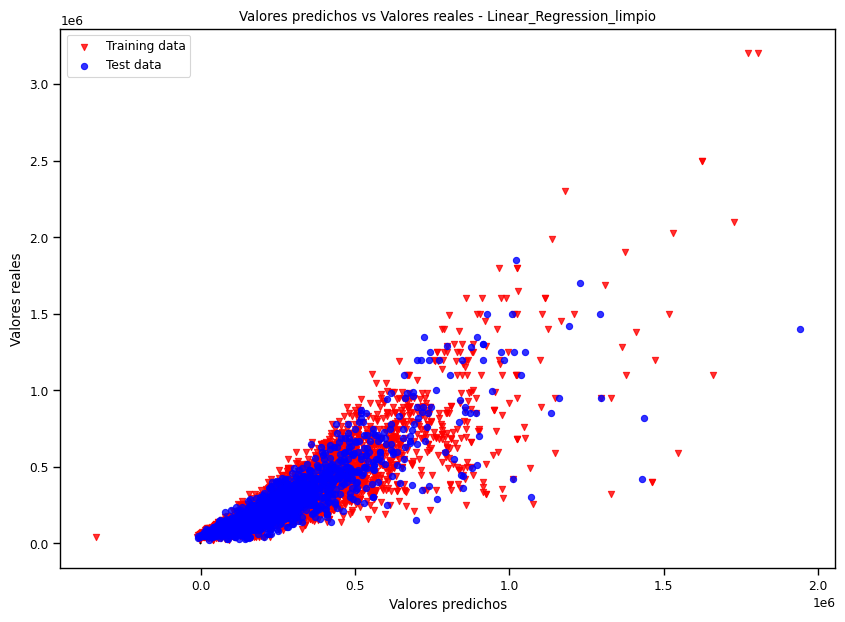

In [293]:
scores_regression(X_train_scaler_limpio, X_test_scaler_limpio, y_train_limpio, y_test_limpio, linreg, "Linear_Regression_limpio")

In [294]:
ols_sumary(X_train_limpio, y_train_limpio, linreg)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1272.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:25:32   Log-Likelihood:            -1.7123e+05
No. Observations:               13500   AIC:                         3.425e+05
Df Residuals:                   13457   BIC:                         3.429e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 6.025e+06   8.44e+05      7.137      0.000    4.37e+06    7.68e+06
lat                                  -5.666e+04   4.52e+04     -1.254      0.210   -1.45e+05    3.19e+04
lon                                   1.371e+05   3.26e+04      4.208      0.000    7.32e+04    2.01e+05
surface_total_in_m2                   2372.1493     14.078    168.499      0.000    2344.554    2399.744
cochera                                3.62e+04   1466.926     24.679      0.000    3.33e+04    3.91e+04
rooms_2 ambientes                     1548.0594   1730.634      0.895      0.371   -1844.226    4940.345
rooms_4 o mas ambientes               -433.4106   2070.358     -0.209      0.834   -4491.603    3624.782
place_name_Balvanera                 -2.344e+04   5067.150     -4.626      0.000   -3.34e+04   -1.35e+04
place_name_Barracas                  -3.011e+04   6869.208     -4.384      0.000   -4.36e+04   -1.66e+04
place_name_Barrio Norte               5.288e+04   4512.660     11.718      0.000     4.4e+04    6.17e+04
place_name_Belgrano                   6.688e+04   4900.985     13.647      0.000    5.73e+04    7.65e+04
place_name_Boedo                     -1.255e+04   7608.591     -1.649      0.099   -2.75e+04    2363.562
place_name_Caballito                  1.436e+04   3887.680      3.694      0.000    6739.516     2.2e+04
place_name_Capital Federal            1.389e+04   7512.965      1.849      0.064    -833.987    2.86e+04
place_name_Centro / Microcentro      -1.418e+04   7801.553     -1.817      0.069   -2.95e+04    1116.430
place_name_Chacarita                  6322.9793   8382.402      0.754      0.451   -1.01e+04    2.28e+04
place_name_Coghlan                     1.79e+04   8106.938      2.208      0.027    2011.704    3.38e+04
place_name_Colegiales                 2.709e+04   6770.027      4.002      0.000    1.38e+04    4.04e+04
place_name_Congreso                    -3.1e+04   7204.735     -4.302      0.000   -4.51e+04   -1.69e+04
place_name_Constitución              -3.502e+04   7820.849     -4.478      0.000   -5.03e+04   -1.97e+04
place_name_Flores                    -1.057e+04   4389.418     -2.408      0.016   -1.92e+04   -1964.496
place_name_Floresta                  -1.024e+04   6522.842     -1.570      0.116    -2.3e+04    2541.658
place_name_Las Cañitas                 7.95e+04   9291.693      8.556      0.000    6.13e+04    9.77e+04
place_name_Liniers                   -2149.7506   8432.395     -0.255      0.799   -1.87e+04    1.44e+04
place_name_Monserrat                 -2.819e+04   6014.228     -4.687      0.000      -4e+04   -1.64e+04
place_name_Nuñez                      4.579e+04   6742.979      6.790      0.000    3.26e+04     5.9e+04
place_name_Once                      -

,Var_name,p-Value
0,rooms_4 o mas ambientes,0.834
1,place_name_Liniers,0.799
2,place_name_Villa del Parque,0.742
3,place_name_Villa Luro,0.662
4,place_name_Chacarita,0.451
5,rooms_2 ambientes,0.371
6,lat,0.210
7,place_name_Parque Patricios,0.154
8,place_name_Floresta,0.116
9,place_name_Boedo,0.099


## Elastic Net - Limpio

MAE - TRAIN: 41977.654
MAE - TEST: 42032.393
--------------------

MSE - TRAIN: 6157451687.22
MSE - TEST: 5901569239.747
--------------------

RMSE - TRAIN: 78469.432
RMSE - TEST: 76821.672
--------------------

R2 - TRAIN: 0.797
R2 - TEST: 0.802
--------------------

R2 AJUSTADO - TRAIN: 0.7961180216640876
R2 AJUSTADO - TEST: 0.8011397452684205
--------------------

El mejor valor alpha es 0.1
El intercepto es 191391.09875925948
	
Coeficientes del modelo:	
[  2810.76551605   3139.58580059 131204.97695076  17835.84185251
   -239.81253883   4382.45360177  -5329.37641281  -3685.83522113
   8802.40678481  14208.32248809  -2041.28368401    698.78543245
    257.35779356  -2075.71421356   -970.71876696   -339.1455811
   1113.5754699   -3912.30912898  -3942.24618086  -4860.55055126
  -2915.99263802   4993.95274676  -1399.06748788  -4601.38849978
   3591.88533377  -2316.97806133  14738.0618555    4072.86887132
   2959.07582724  -1616.65458852  17971.73389762   3471.93153308
   -775.41734934  -

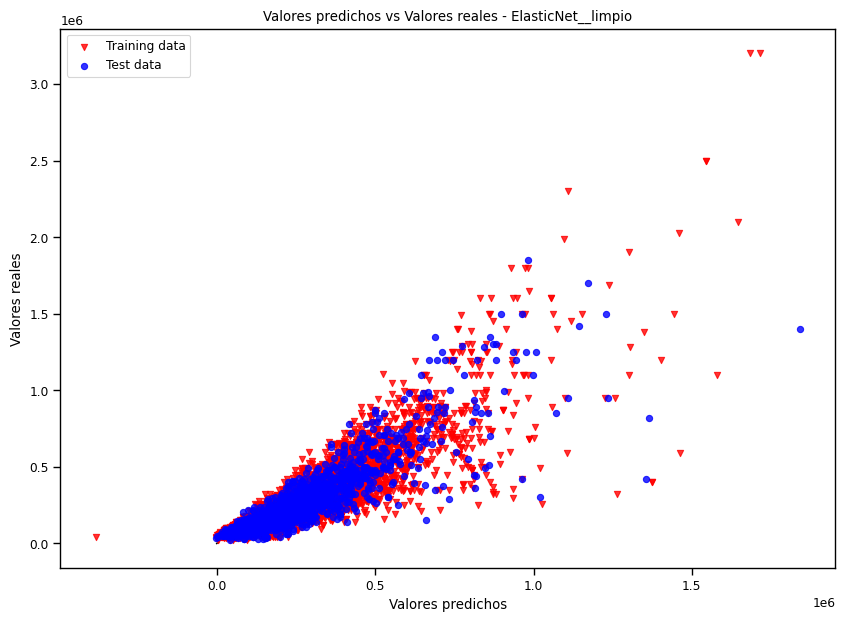

In [295]:
scores_regression(X_train_scaler_limpio, X_test_scaler_limpio, y_train_limpio, y_test_limpio, elastic, "ElasticNet__limpio")

## Lasso - Limpio


MAE - TRAIN: 42126.064
MAE - TEST: 42170.539
--------------------

MSE - TRAIN: 6089395822.526
MSE - TEST: 5915610311.148
--------------------

RMSE - TRAIN: 78034.581
RMSE - TEST: 76913.005
--------------------

R2 - TRAIN: 0.799
R2 - TEST: 0.801
--------------------

R2 AJUSTADO - TRAIN: 0.7981267111058208
R2 AJUSTADO - TEST: 0.8001354005475539
--------------------

El mejor valor alpha es 40.0
El intercepto es 191391.09875925936
	
Coeficientes del modelo:	
[-6.65149360e+02  6.31353392e+03  1.40380410e+05  1.74847245e+04
  5.76781223e+02 -6.97877349e+01 -4.06586354e+03 -3.50670107e+03
  1.06868908e+04  1.84548794e+04 -1.22502480e+03  3.73540819e+03
  1.19239913e+03 -1.32629396e+03  2.63214239e+02  1.33814176e+03
  2.83431135e+03 -3.24542994e+03 -3.31718865e+03 -2.68421362e+03
 -1.45434961e+03  6.00679029e+03 -3.77942307e+02 -3.80279898e+03
  6.15008290e+03 -1.64369689e+03  1.83443262e+04  5.55215002e+03
  4.07335595e+03 -9.87562799e+02  1.98857047e+04  3.96134484e+03
  1.32201038e+03

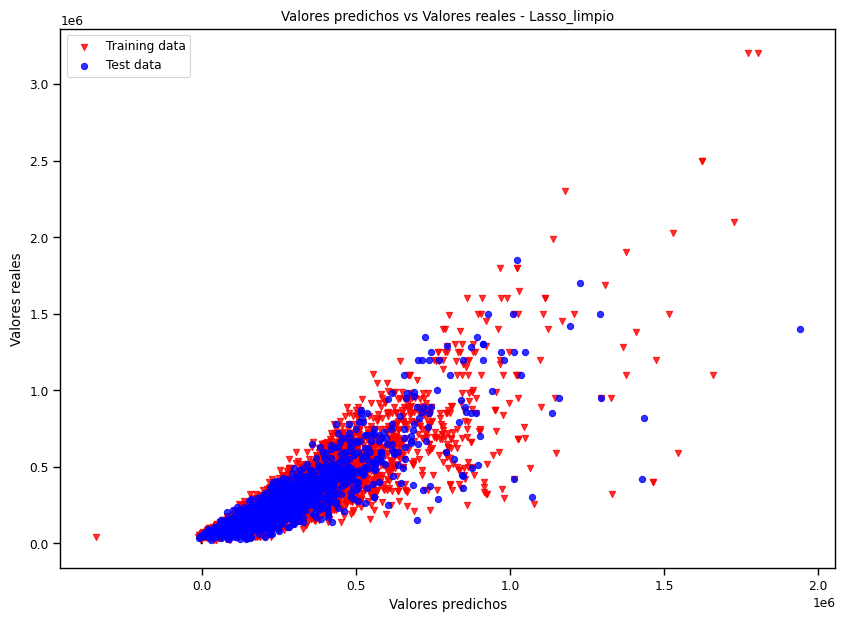

In [296]:
scores_regression(X_train_scaler_limpio, X_test_scaler_limpio, y_train_limpio, y_test_limpio, lasso, "Lasso_limpio")

## Resumen Scores

In [299]:
score_regression = pd.DataFrame({"Modelos": scores_mae.keys(), "MAE": scores_mae.values(), "MSE":scores_mse.values(), "RSME": scores_rmse.values(), "R2": scores_r2.values(), "R2 AJUSTADO": scores_r2_adjust.values()})

display(score_regression)

,Modelos,MAE,MSE,RSME,R2,R2 AJUSTADO
0,Linear Regression_test,40743.322,5554569055.546,74528.981,0.814,0.813
1,Linear Regression_train,40477.997,5583496505.654,74722.798,0.815,0.814
2,Lasso_test,40707.675,5559351462.213,74561.059,0.813,0.812
3,Lasso_train,40428.130,5584383297.332,74728.731,0.815,0.814
4,ElasticNet_test,40676.750,5549006193.730,74491.652,0.814,0.813
5,ElasticNet_train,40248.929,5647238476.206,75148.110,0.813,0.812
6,Linear_Regression_limpio_test,42229.102,5914455885.769,76905.500,0.801,0.800
7,Linear_Regression_limpio_train,42190.053,6088885192.471,78031.309,0.799,0.798
8,ElasticNet__limpio_test,42032.393,5901569239.747,76821.672,0.802,0.801
9,ElasticNet__limpio_train,41977.654,6157451687.220,78469.432,0.797,0.796


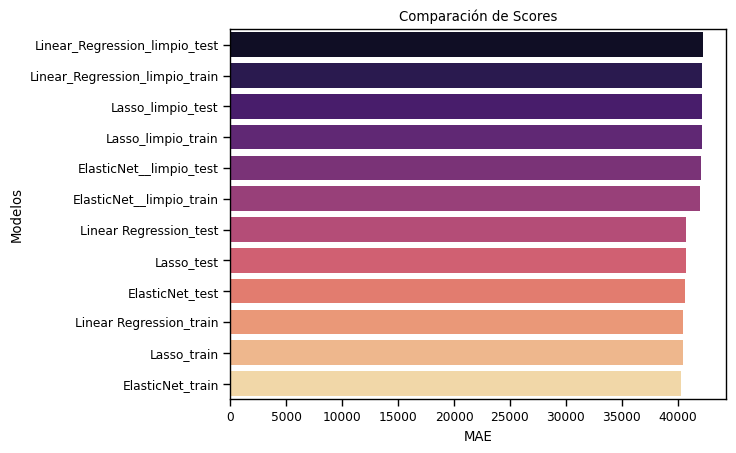

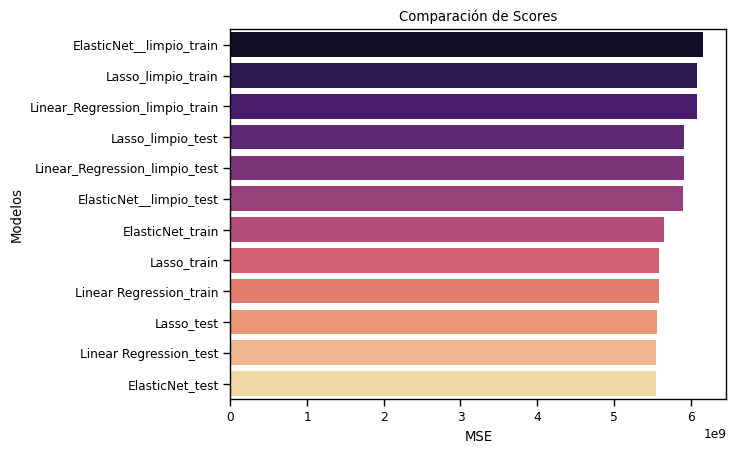

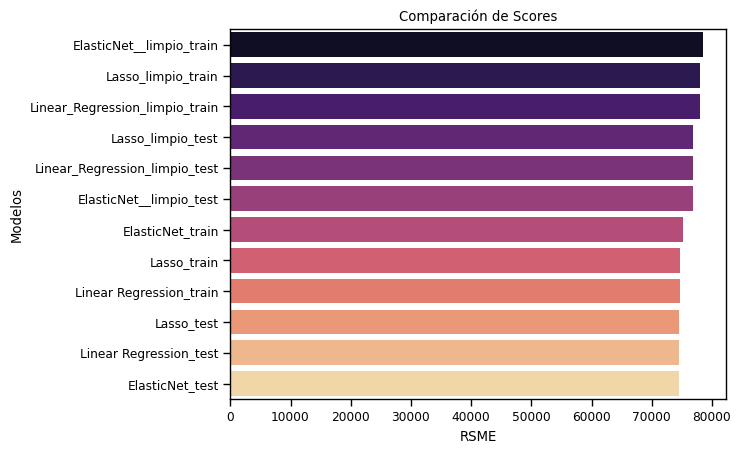

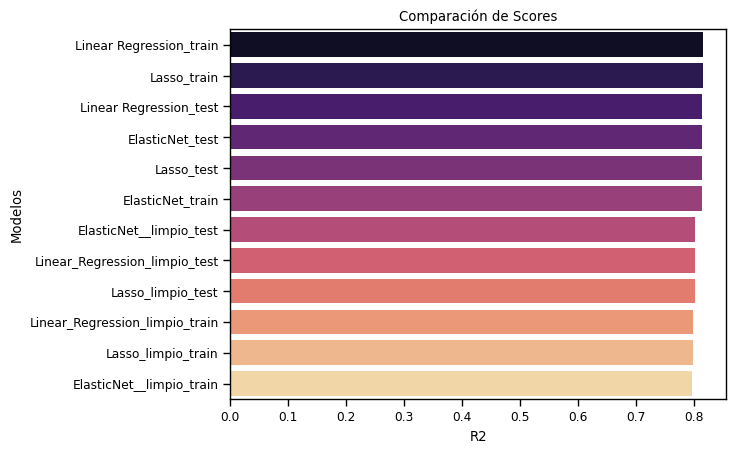

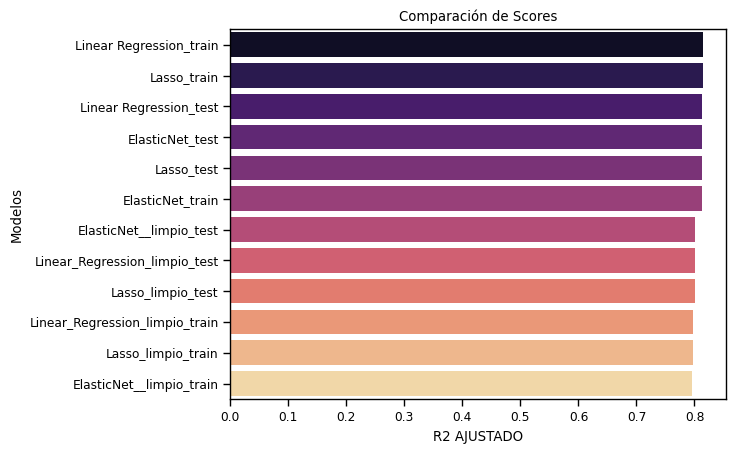

In [300]:
scores_columns= ["MAE", "MSE", "RSME", "R2", "R2 AJUSTADO"]

for scores in scores_columns:
    sns.set_context('paper')
    ax = sns.barplot(x = score_regression[scores] ,y = 'Modelos',data = score_regression.sort_values(by=scores, ascending=False), palette = 'magma')
    ax.set(xlabel=scores, ylabel="Modelos", title="Comparación de Scores")
    plt.show()